# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
#구글 드라이브와 mount(연결)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

#**Data Load**

In [24]:
# Load Data
data = pd.read_csv("/content/drive/MyDrive/Tobigs/week_2 Optimization, Regression/Regression/과제/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [25]:
data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [27]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [28]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [29]:
#불필요한 열 제거
data = data.drop(columns=['Unnamed: 0'])

In [30]:
#전체 데이터 고유값 확인
data.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [31]:
#범주형 컬럼의 고유값 확인
print(data['Location'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
#print(data['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']


In [35]:
#수치형, 범주형 컬럼 정의

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print(numerical_columns)
print(categorical_columns)

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')


#**EDA**


In [42]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = data['Owner_Type'].value_counts().reset_index()
ep.columns = [
    'Owner_Type',
    'percent'
]
ep['percent'] /= len(data)

fig = px.pie(
    ep,
    names='Owner_Type',
    values='percent',
    title='Countplot of Owner_Type',
    width=800,
    height=500
)

fig.show()

- 주로 해당 차의 첫 소유주가 가장 많고, 그 다음으로 중고로 소유한 사람이 많은 것을 확인

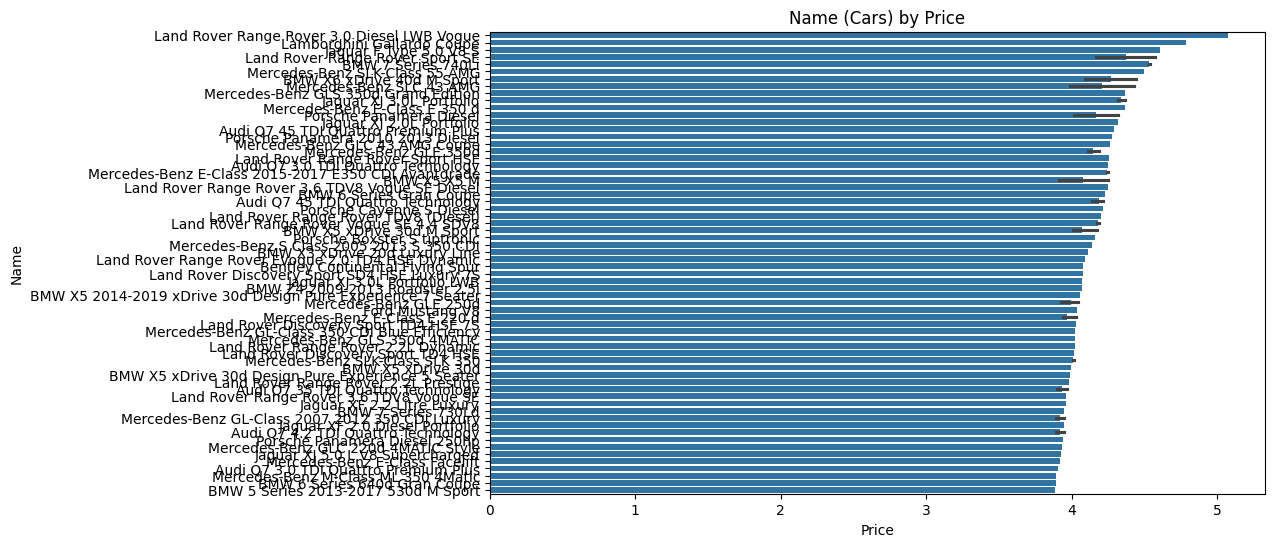

In [43]:
cdi = data.sort_values(by='Price', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.Name, x=cdi.Price)
plt.xticks()
plt.xlabel('Price')
plt.ylabel('Name')
plt.title('Name (Cars) by Price')
plt.show()

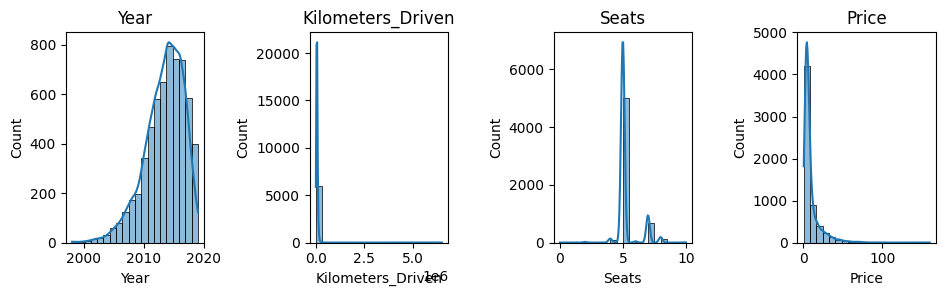

In [37]:
# 수치형 컬럼 분포 확인
plt.figure(figsize=(12, 8))

# numerical_columns를 리스트로 변환
num_cols_list = list(numerical_columns)

for i, feature in enumerate(num_cols_list):
    plt.subplot(3, 5, i + 1)  # 3행 5열의 subplot 구조
    sns.histplot(data=data[feature], bins=20, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

- Year: 대부분의 차량이 최근 몇 년 내의 모델임을 나타내며 상대적으로 새로운 차량이 많음

- Kilometers_Driven: 주행 거리가 낮은 차량이 많으며, 매우 높은 주행 거리를 가진 차량은 상대적으로 적음.

- Seats: 5인승 차량이 가장 흔함

- Price: 낮은 가격대의 차량이 많은 분포를 차지



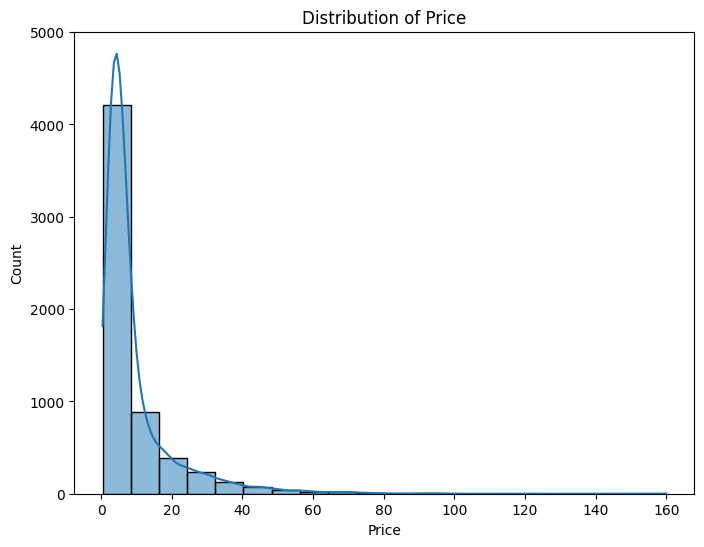

In [39]:
#Price
plt.figure(figsize=(8, 6))
sns.histplot(data=data['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

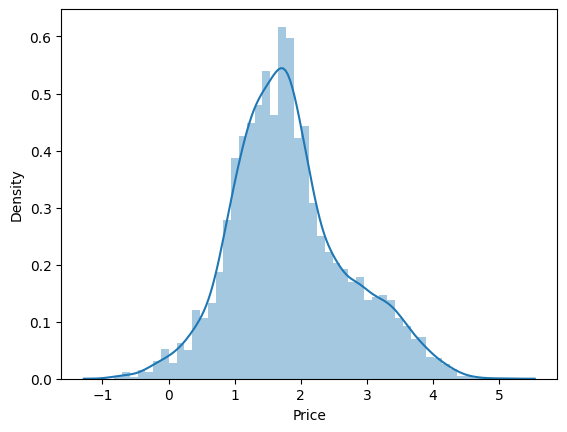

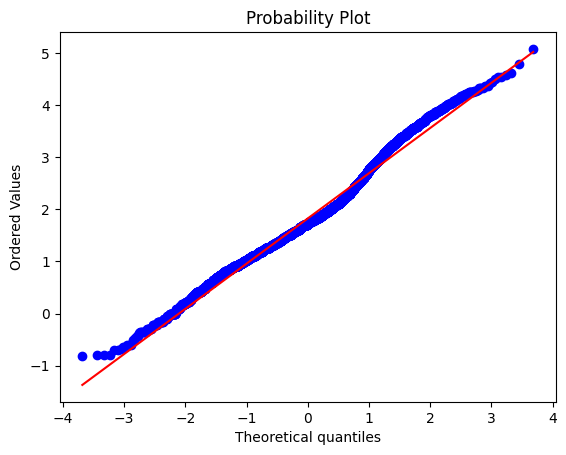

In [41]:
from scipy import stats

#applying log transformation
data['Price'] = np.log(data['Price'])

#transformed histogram and normal probability plot
sns.distplot(data['Price'], fit=None);
fig = plt.figure()

res = stats.probplot(data['Price'], plot=plt)

- hist
- 히스토그램이 정규 분포와 유사함
  - 로그 변환이 성공적으로 'Price' 데이터의 왜도를 줄임을 확인.

- Q-Q Plot
- 데이터 포인트가 선에 가깝게 위치함을 확인. 데이터는 정규 분포를 더 잘 따르는 것으로 간주됨.

#**Data preprocessing**

In [44]:
#모델명에서 브랜드와 모델 이름을 분리
data['brand'] = data['Name'].apply(lambda x: x.split(' ')[0])
data['model'] = data['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

data[['Name', 'brand', 'model']].head()

#잘 분리됨을 확인

,Name,brand,model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New 2.0 TDI Multitronic


In [45]:
#인코딩
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [49]:
#Feature scaling
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

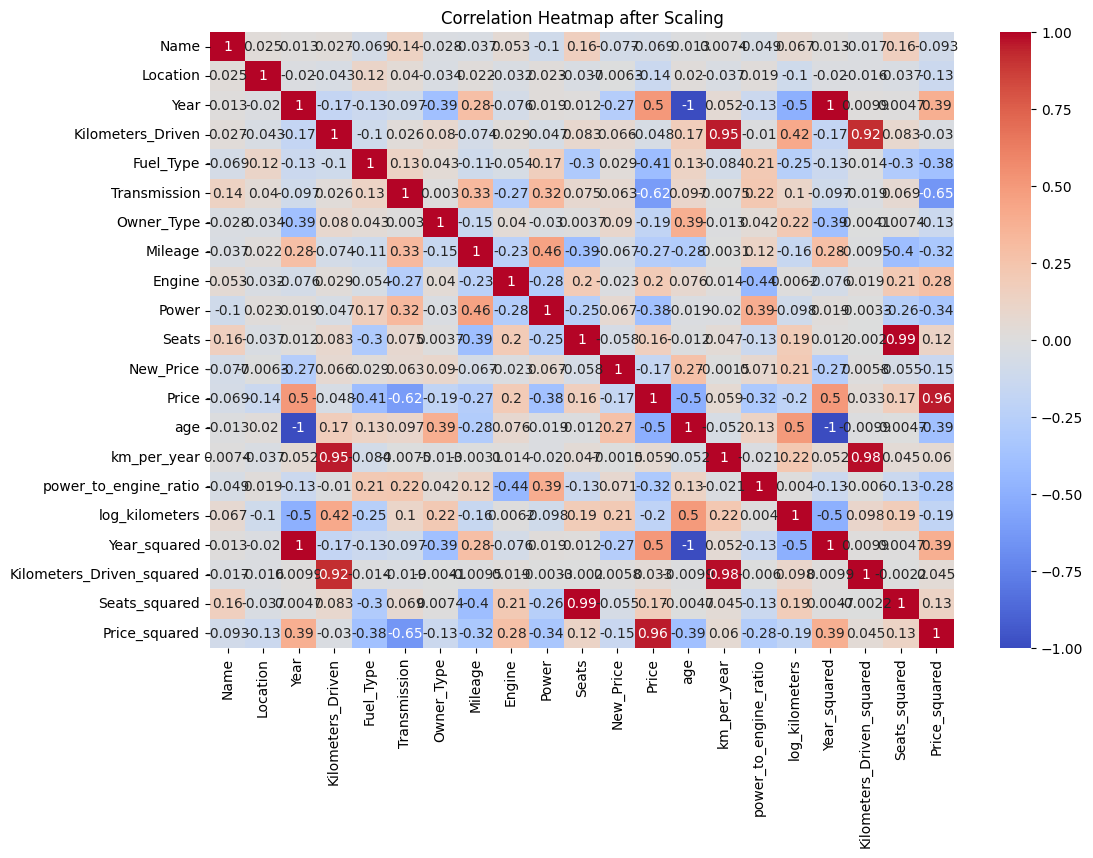

In [50]:
#상관관계 계산
correlation_matrix = data.corr()

#히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap after Scaling')
plt.show()

#**Feature Engineering**

In [48]:
#Feature engineering

#연식 대비 주행 거리
data['age'] = 2021 - data['Year']  # 차량 연식 계산
data['km_per_year'] = data['Kilometers_Driven'] / data['age']

#Engine, Power 문자열로 변환
data['Engine'] = data['Engine'].astype(str)
data['Power'] = data['Power'].astype(str)

# 엔진 크기 대비 마력 계산
data['Engine'] = pd.to_numeric(data['Engine'].str.replace(' CC',''), errors='coerce')
data['Power'] = pd.to_numeric(data['Power'].str.replace(' bhp',''), errors='coerce')
data['power_to_engine_ratio'] = data['Power'] / data['Engine']

#기존 수치형 컬럼의 로그 변환
data['log_kilometers'] = np.log(data['Kilometers_Driven'] + 1)

#기존 수치형 컬럼의 제곱값 생성
for column in numerical_columns:
    if column in data.columns:
        data[f'{column}_squared'] = data[column] ** 2

data[['km_per_year', 'power_to_engine_ratio', 'log_kilometers'] + [f'{column}_squared' for column in numerical_columns]].head()

,km_per_year,power_to_engine_ratio,log_kilometers,Year_squared,Kilometers_Driven_squared,Seats_squared,Price_squared
0,6545.454545,1.805556,11.184435,4040100,5184000000,25.0,0.313170
1,6833.333333,1.435897,10.621352,4060225,1681000000,25.0,6.379305
2,4600.000000,28.666667,10.736418,4044121,2116000000,25.0,2.262249
3,9666.666667,24.714286,11.373675,4048144,7569000000,49.0,3.210402
4,5083.750000,1.310345,10.613271,4052169,1654048900,25.0,8.270352


#**Modeling**

In [52]:
X = data.drop('Price', axis=1)  #Price를 제외한 나머지 컬럼을 독립 변수로 사용
y = data['Price']  #Price 컬럼을 종속 변수로 사용

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = data.select_dtypes(include=['object']).columns

#ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# 모델 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.19648145122216898


#**regression diagnosis**

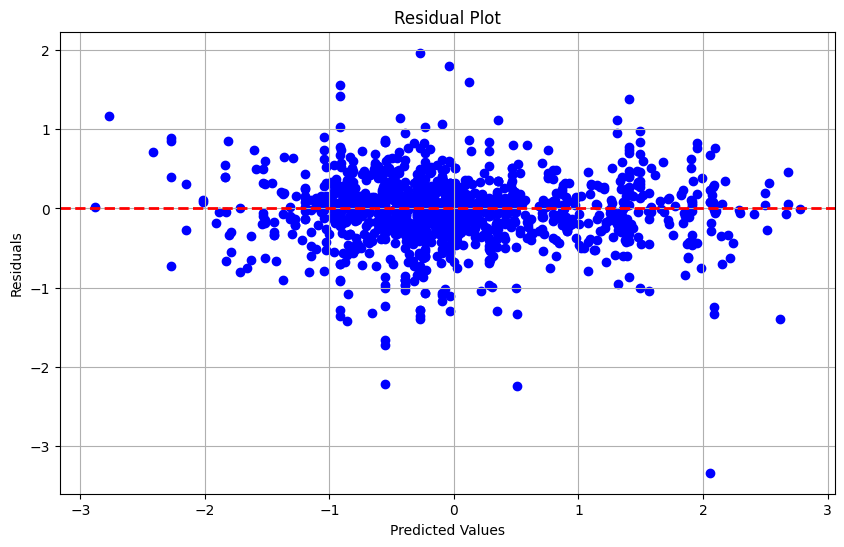

In [57]:
#잔차 계산
residuals = y_test - y_pred

#Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, c='b', marker='o')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

- Y축의 잔차 값이 0 주변에 분포되어 있으므로, 모델이 평균적으로는 예측값을 정확하게 예측하고 있다는 것을 나타냄. 이는 선형 회귀 모델이 데이터에 대해 어느 정도 적합하다는 것을 의미함.

- X축의 예측값 범위 내에서 잔차가 -1에서 1 사이에 많이 분포되어 있다면, 모델이 대체로 잔차를 비교적 균일하게 분배하고 있다는 것을 의미함. 즉, 예측값의 범위 내에서 잔차가 고르게 퍼져 있으므로 모델이 일정한 예측 오차를 가지고 있음을 의미.

- Y축의 잔차가 0 주변에 분포되어 있기 때문에 모델의 상수항(절편)이 잘 설정되어 있을 가능성이 높음. R-squared 값은 모델이 얼마나 데이터를 설명하는지를 나타내므로, 이 값을 확인하여 모델의 설명력을 평가할 수 있음

- 잔차 플롯에서 X축 예측값 범위 내에서 잔차가 일정하게 분포되어 있다면, 잔차의 분산이 일정하다는 것을 의미함. 헤테로스케다스티시티(Heteroscedasticity)가 나타나지 않았다는 것이며, 모델의 예측 오차가 예측값에 따라 크게 변하지 않는다는 것을 나타냄.

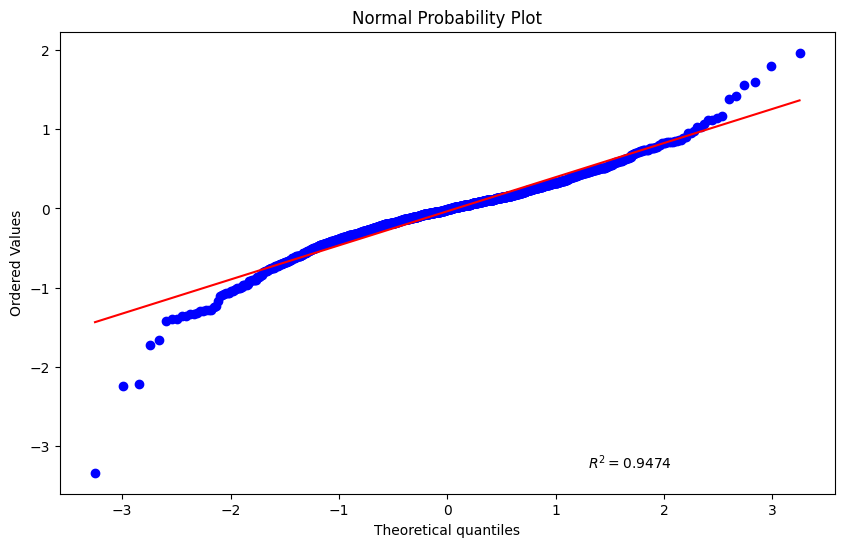

In [58]:
#Normality Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt, rvalue=True)
plt.title("Normal Probability Plot")
plt.show()